In [18]:
install.packages("dplyr")
install.packages("tidyverse")

Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'tidyverse' is in use and will not be installed"


In [19]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

character(0)

# Installing and loading multiple packages


In [20]:
###installing and loading multiple packages
list.packages<-c("fGarch", "PerformanceAnalytics","rugarch","tseries","xts","FinTS","urca")
new.packages <- list.packages[!(list.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)
#Loading Packages
invisible(lapply(list.packages, require, character.only = TRUE))

# Set working Directory and Upload Data

In [21]:
#set working directory
#setwd("")# in inverted commas, add the path to your working directory.
#BMW<-read.csv(BMW.csv)# Upload your data if you are using the R console or Jupyter notebook. 

In [22]:
# in Kaggle upload your data
BMW<-read.csv("c:/users/Enric/Downloads/BMW.csv", sep=";", header=TRUE)

In [23]:
head(BMW) # Look out for commas instead of dots!!!

,Years,Prices
,<chr>,<dbl>
1,06/11/1995,11.984
2,07/11/1995,12.000
3,08/11/1995,12.158
4,09/11/1995,12.316
5,10/11/1995,12.221
6,13/11/1995,12.221


In [24]:
#set timeseries element
BMW$Years <- as.Date(BMW$Years, "%d/%m/%Y")
class(BMW$Years)


[1] "Date"

In [25]:
BMW$Prices

[1] 11.984 12.000 12.158 12.316 12.221 12.221 12.403 12.292 12.364 12.395
  [11] 12.530 12.427 12.372 12.206 12.071 12.332 12.379 12.356 12.316 12.395
  [21] 12.332 12.063 11.960 11.953 11.818 11.858 11.984 11.897 12.032 11.968
  [31] 11.866 11.715 11.731 11.723 11.810 11.810 11.810 11.731 11.692 11.621
  [41] 11.621 11.747 12.142 12.292 12.332 12.395 12.550 12.538 12.482 12.585
  [51] 12.601 12.822 12.759 12.743 12.735 12.648 12.727 13.083 13.107 13.091
  [61] 13.273 13.281 13.375 13.202 13.104 12.957 12.964 12.980 12.885 12.759
  [71] 12.822 12.980 12.944 12.980 12.933 12.814 12.696 12.696 12.775 12.972
  [81] 12.870 12.909 12.996 13.059 13.202 13.067 13.036 12.885 12.933 12.822
  [91] 12.577 12.783 12.798 12.727 12.806 12.791 12.933 12.806 12.775 12.601
 [101] 12.443 12.324 12.285 12.292 12.198 12.387 12.427 12.387 12.577 12.577
 [111] 12.577 12.625 12.964 12.949 12.949 13.202 13.067 13.012 13.107 13.265
 [121] 13.154 13.265 13.289 13.241 13.296 13.107 13.067 13.067 13.028 12.798
 [131] 12.862 12.862 12.933 13.028 12.957 13.107 13.075 12.909 12.909 13.130
 [141] 13.091 13.138 13.194 13.194 13.162 13.162 13.257 13.270 13.289 13.281
 [151] 13.254 13.462 13.613 13.613 13.708 13.787 13.771 13.842 13.771 13.889
 [161] 13.881 13.866 13.850 13.834 13.874 13.953 13.881 13.913 13.866 13.953
 [171] 13.937 13.881 13.802 13.913 14.182 14.150 14.174 14.095 13.874 13.597
 [181] 13.518 13.336 13.363 13.344 13.399 13.344 13.344 13.225 13.178 13.273
 [191] 13.281 13.138 13.043 13.059 13.289 13.375 13.265 13.241 13.312 13.265
 [201] 13.296 13.217 13.296 13.312 13.312 13.375 13.320 13.407 13.549 13.597
 [211] 13.534 13.557 13.597 13.581 13.565 13.565 13.504 13.700 13.597 13.605
 [221] 13.613 13.739 13.723 13.715 13.787 13.771 13.755 13.755 13.731 13.818
 [231] 13.755 13.810 13.874 13.850 13.826 13.810 13.889 13.913 13.913 13.913
 [241] 14.000 13.957 13.976 13.866 13.866 13.921 14.292 14.261 14.261 14.269
 [251] 14.292 14.221 14.221 14.087 14.123 14.198 14.032 14.079 14.008 14.103
 [261] 13.976 14.348 14.553 14.561 14.656 14.577 14.577 14.640 14.640 14.759
 [271] 14.767 14.791 14.735 14.704 14.783 15.067 15.573 15.431 15.676 15.763
 [281] 15.984 16.561 16.569 16.870 16.206 16.585 17.028 16.474 16.458 15.921
 [291] 16.253 16.111 16.142 16.032 16.640 16.680 16.680 16.680 16.680 16.632
 [301] 16.964 16.964 16.964 16.648 16.743 16.443 16.553 16.648 16.648 17.043
 [311] 16.996 16.980 17.391 17.170 17.376 17.415 16.996 17.028 16.996 16.411
 [321] 16.174 16.221 16.285 16.640 16.585 16.324 16.538 16.870 16.949 16.972
 [331] 17.296 17.755 18.324 18.704 18.814 18.514 18.719 18.435 18.055 17.929
 [341] 17.976 18.134 17.976 18.008 17.960 17.945 18.379 18.514 18.862 19.130
 [351] 19.289 19.747 20.040 20.411 19.652 19.557 18.814 18.877 18.783 18.751
 [361] 18.783 19.352 20.632 21.344 21.344 21.344 20.316 20.016 19.273 20.158
 [371] 20.269 21.202 22.166 22.751 22.103 21.818 22.387 22.403 22.625 21.858
 [381] 21.644 21.676 21.818 22.055 22.292 21.945 21.739 22.419 22.419 23.099
 [391] 23.557 23.953 23.573 23.573 23.542 23.004 23.210 23.162 22.609 22.577
 [401] 22.577 21.897 21.818 21.787 22.545 23.099 23.352 22.482 22.482 22.119
 [411] 22.229 22.213 22.498 22.593 22.593 21.597 21.708 21.723 21.850 22.640
 [421] 22.514 22.134 22.593 22.530 22.466 22.166 22.182 22.277 22.561 22.640
 [431] 22.814 22.435 22.798 23.320 23.083 23.194 23.573 23.779 23.320 23.494
 [441] 24.332 24.269 24.221 24.332 24.000 22.941 23.115 23.700 23.668 23.636
 [451] 23.320 22.925 22.957 23.684 23.573 23.020 23.273 23.225 23.083 22.783
 [461] 22.419 22.814 22.340 21.581 21.091 20.474 21.154 21.976 21.897 20.949
 [471] 20.996 20.261 20.585 20.664 20.237 20.395 20.759 21.075 20.949 20.617
 [481] 20.791 21.059 21.597 21.170 20.711 21.059 21.383 21.992 21.344 21.565
 [491] 21.534 21.976 22.008 22.925 22.893 23.320 23.787 23.668 23.668 23.668
 [501] 23.241 23.115 23.004 23.036 22.451 22.909 22.656 22.672 22.372 21.866
 [511] 21.344 21.692 22.008 21.344 21.976 20.870 17.787 19.921 19.605 19.715

In [26]:
BMW.z = zoo(x=BMW$Prices, order.by=BMW$Years)
BMW.z

1995-11-06 1995-11-07 1995-11-08 1995-11-09 1995-11-10 1995-11-13 1995-11-14 
    11.984     12.000     12.158     12.316     12.221     12.221     12.403 
1995-11-15 1995-11-16 1995-11-17 1995-11-20 1995-11-21 1995-11-22 1995-11-23 
    12.292     12.364     12.395     12.530     12.427     12.372     12.206 
1995-11-24 1995-11-27 1995-11-28 1995-11-29 1995-11-30 1995-12-01 1995-12-04 
    12.071     12.332     12.379     12.356     12.316     12.395     12.332 
1995-12-05 1995-12-06 1995-12-07 1995-12-08 1995-12-11 1995-12-12 1995-12-13 
    12.063     11.960     11.953     11.818     11.858     11.984     11.897 
1995-12-14 1995-12-15 1995-12-18 1995-12-19 1995-12-20 1995-12-21 1995-12-22 
    12.032     11.968     11.866     11.715     11.731     11.723     11.810 
1995-12-25 1995-12-26 1995-12-27 1995-12-28 1995-12-29 1996-01-01 1996-01-02 
    11.810     11.810     11.731     11.692     11.621     11.621     11.747 
1996-01-03 1996-01-04 1996-01-05 1996-01-08 1996-01-09 1996-01-1

#  Return.calculate() R function : calculate simple or compound returns from prices

In [27]:
Return.BMW<-Return.calculate(BMW.z, method = "log")[-1]

# 1. Check the Stationarity

# ADF-test either from the "tseries" or "urca" packages can be used.

The *urca* package in R is a package that provides functions for unit root and cointegration analysis. "URCA" stands for "Unit Root and Cointegration Analysis," and this package is particularly useful for time series analysis and econometrics.

## Unit tests
A unit root is a statistical property of a time series variable that indicates it has a stochastic or random trend rather than a deterministic trend. In simpler terms, a unit root suggests that the variable is non-stationary and exhibits a tendency to deviate from its mean over time in a random manner.

The presence of a unit root has important implications for time series analysis, particularly in the context of econometrics and financial modeling. Understanding whether a time series has a unit root is crucial for making accurate predictions and drawing reliable conclusions about its behavior.

In [28]:
ADF_Returns = ur.df(Return.BMW, type = "drift",selectlags = "AIC" )

In [29]:
summary(ADF_Returns)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.156291 -0.010786 -0.000023  0.010886  0.138128 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0004118  0.0003170   1.299 0.193978    
z.lag.1     -1.0096970  0.0201650 -50.072  < 2e-16 ***
z.diff.lag   0.0552591  0.0145795   3.790 0.000152 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02171 on 4692 degrees of freedom
Multiple R-squared:   0.48,	Adjusted R-squared:  0.4798 
F-statistic:  2166 on 2 and 4692 DF,  p-value: < 2.2e-16


Value of test-statistic is: -50.0717 1253.588 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.43 -2.86 -2.57
phi1  6.43  4.59  3.78


We can reject $H_0$ (the time series is not stationary), therefore the time series is stationary.

# 2. Check the Presence of Volatility
This plot.zoo function is a convenient method for plotting time series objects with additional options and flexibility compared to the base plotting functions. 

It takes advantage of the structure of "zoo" objects to create informative time series plots.

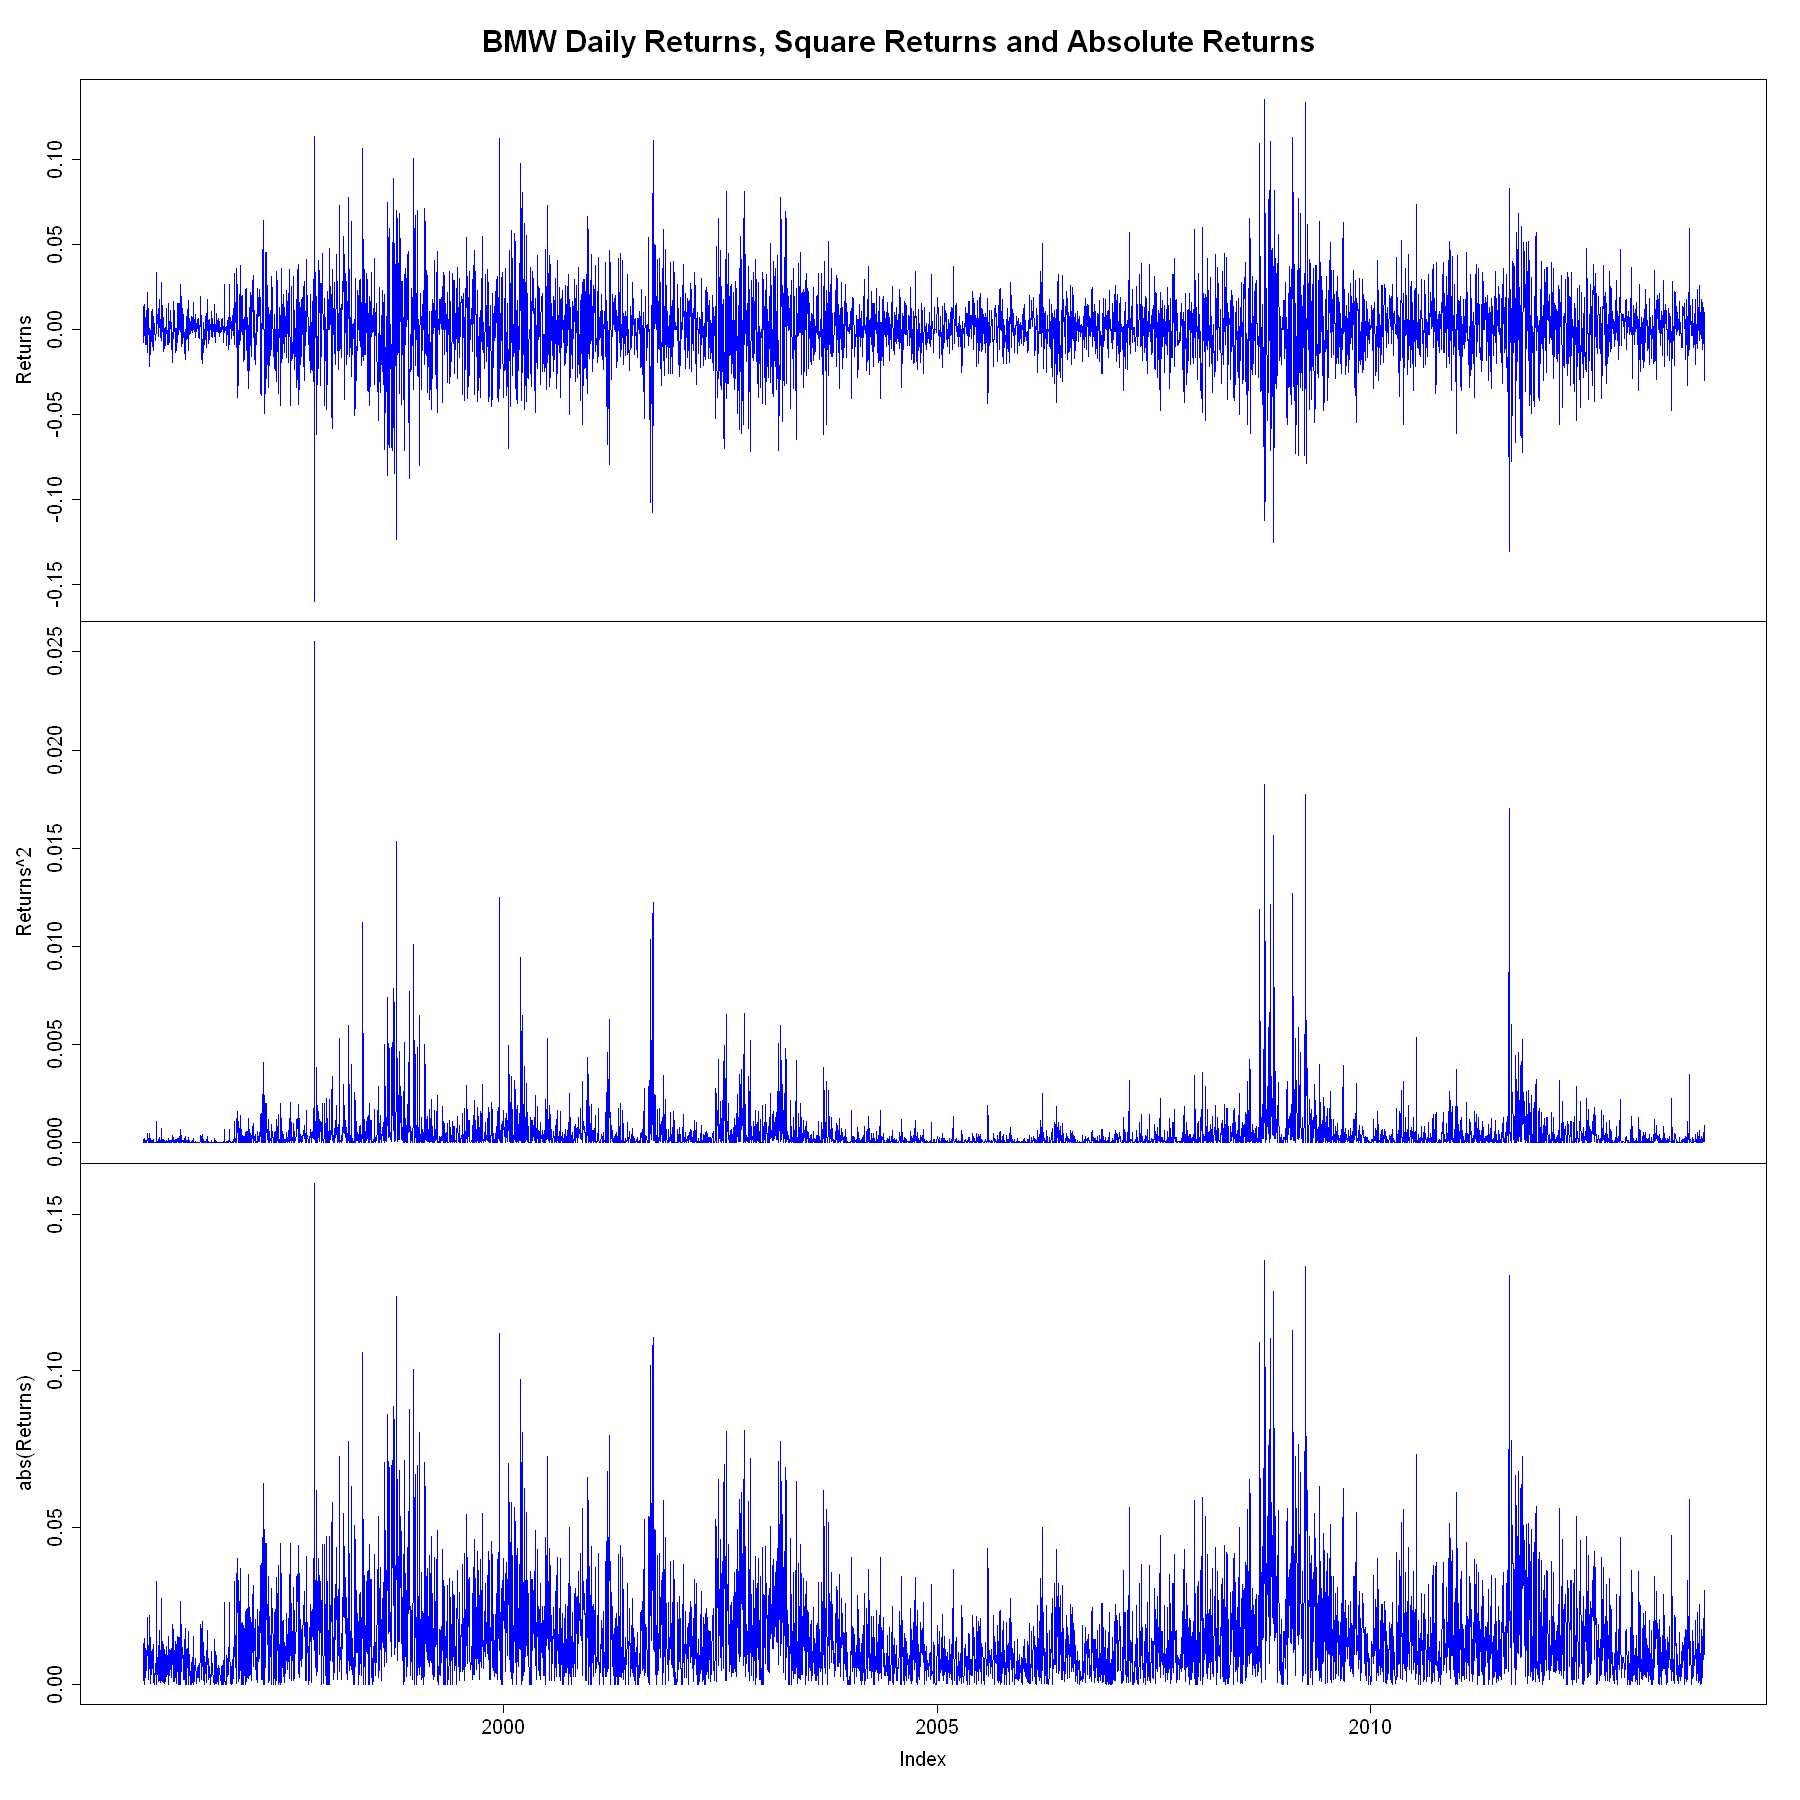

In [63]:
# plot returns with squared and absolute returns
dataToPlot = cbind(Return.BMW, Return.BMW^2))

colnames(dataToPlot) = c("Returns", "Returns^2")

plot.zoo(dataToPlot, main="BMW Daily Returns, Square Returns and Absolute Returns",cex.lab=1.5, cex.axis=1.5,cex.main=2.3, col="blue")

# 3. Check the Normality

In [31]:
options(repr.plot.width=20, repr.plot.height=10)

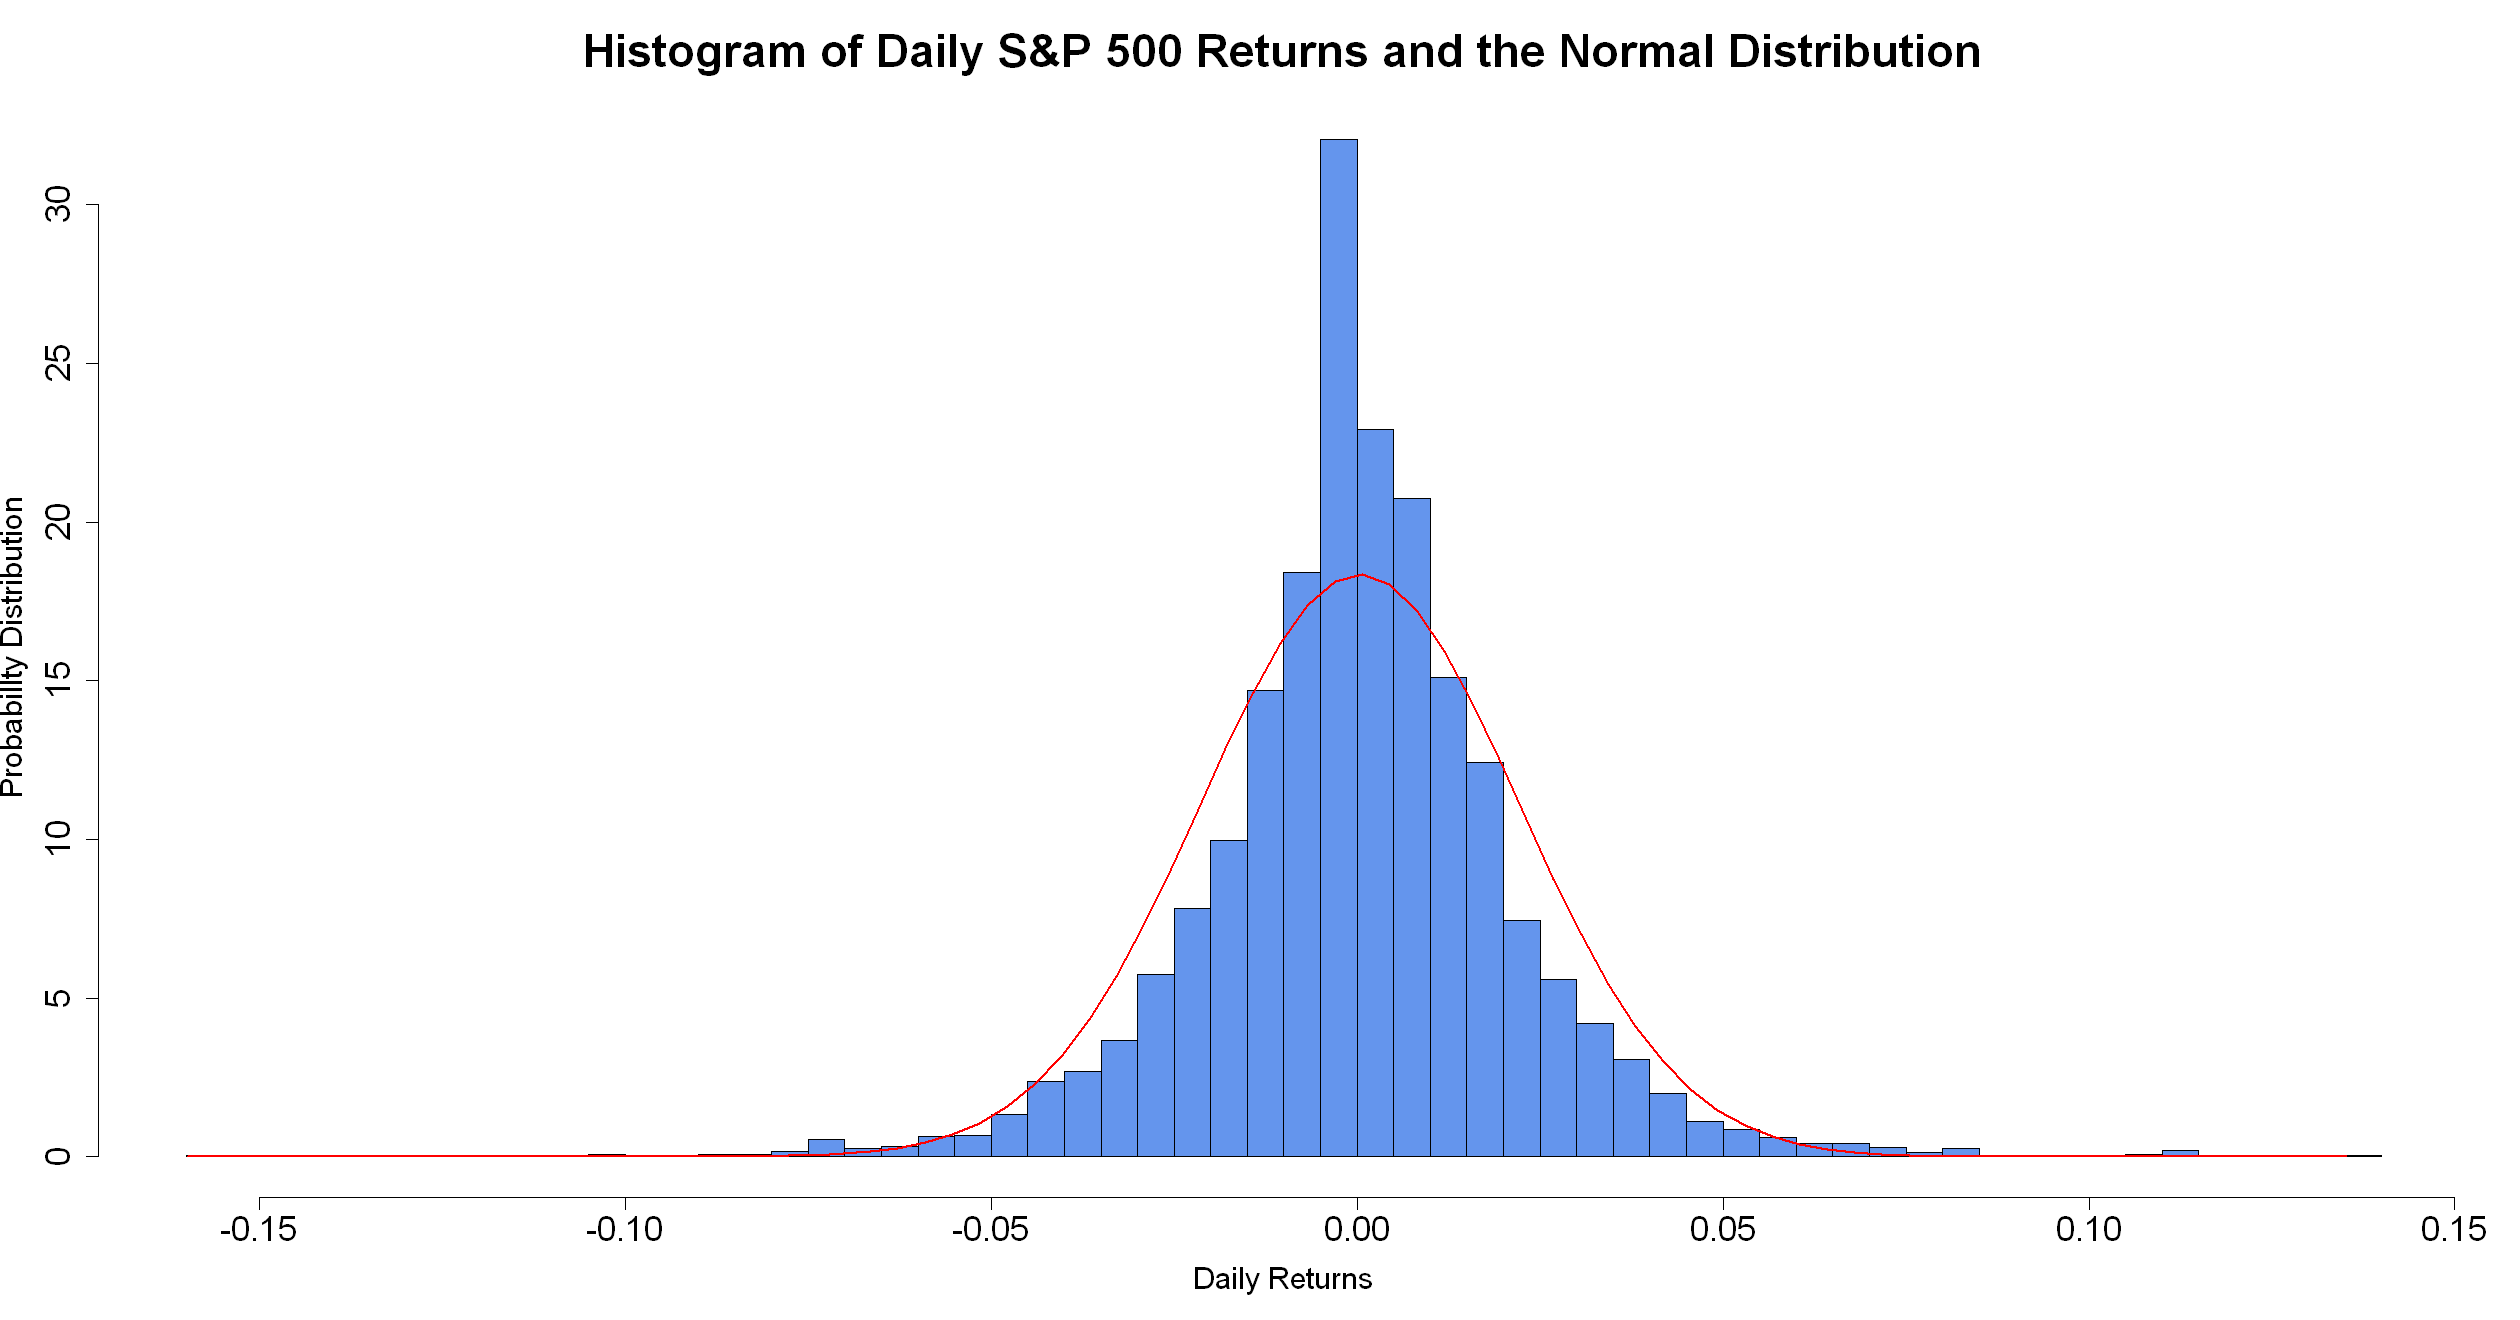

In [32]:
#histogram with normal density curve
options(repr.plot.width=21, repr.plot.height=11)#to set the figure size
hist(Return.BMW,prob=T,breaks=50,xlab="Daily Returns",main = "Histogram of Daily S&P 500 Returns and the Normal Distribution",
ylab="Probabillty Distribution",col="cornflowerblue", cex.lab=1.5, cex.axis=1.7,cex.main=2.3) 

mu<-mean(Return.BMW)  
sigma<-sd(Return.BMW)

x<-seq(min(Return.BMW),max(Return.BMW),length=80) 
y<-dnorm(x,mu,sigma) 

lines(x,y,lwd=2,col="red")  

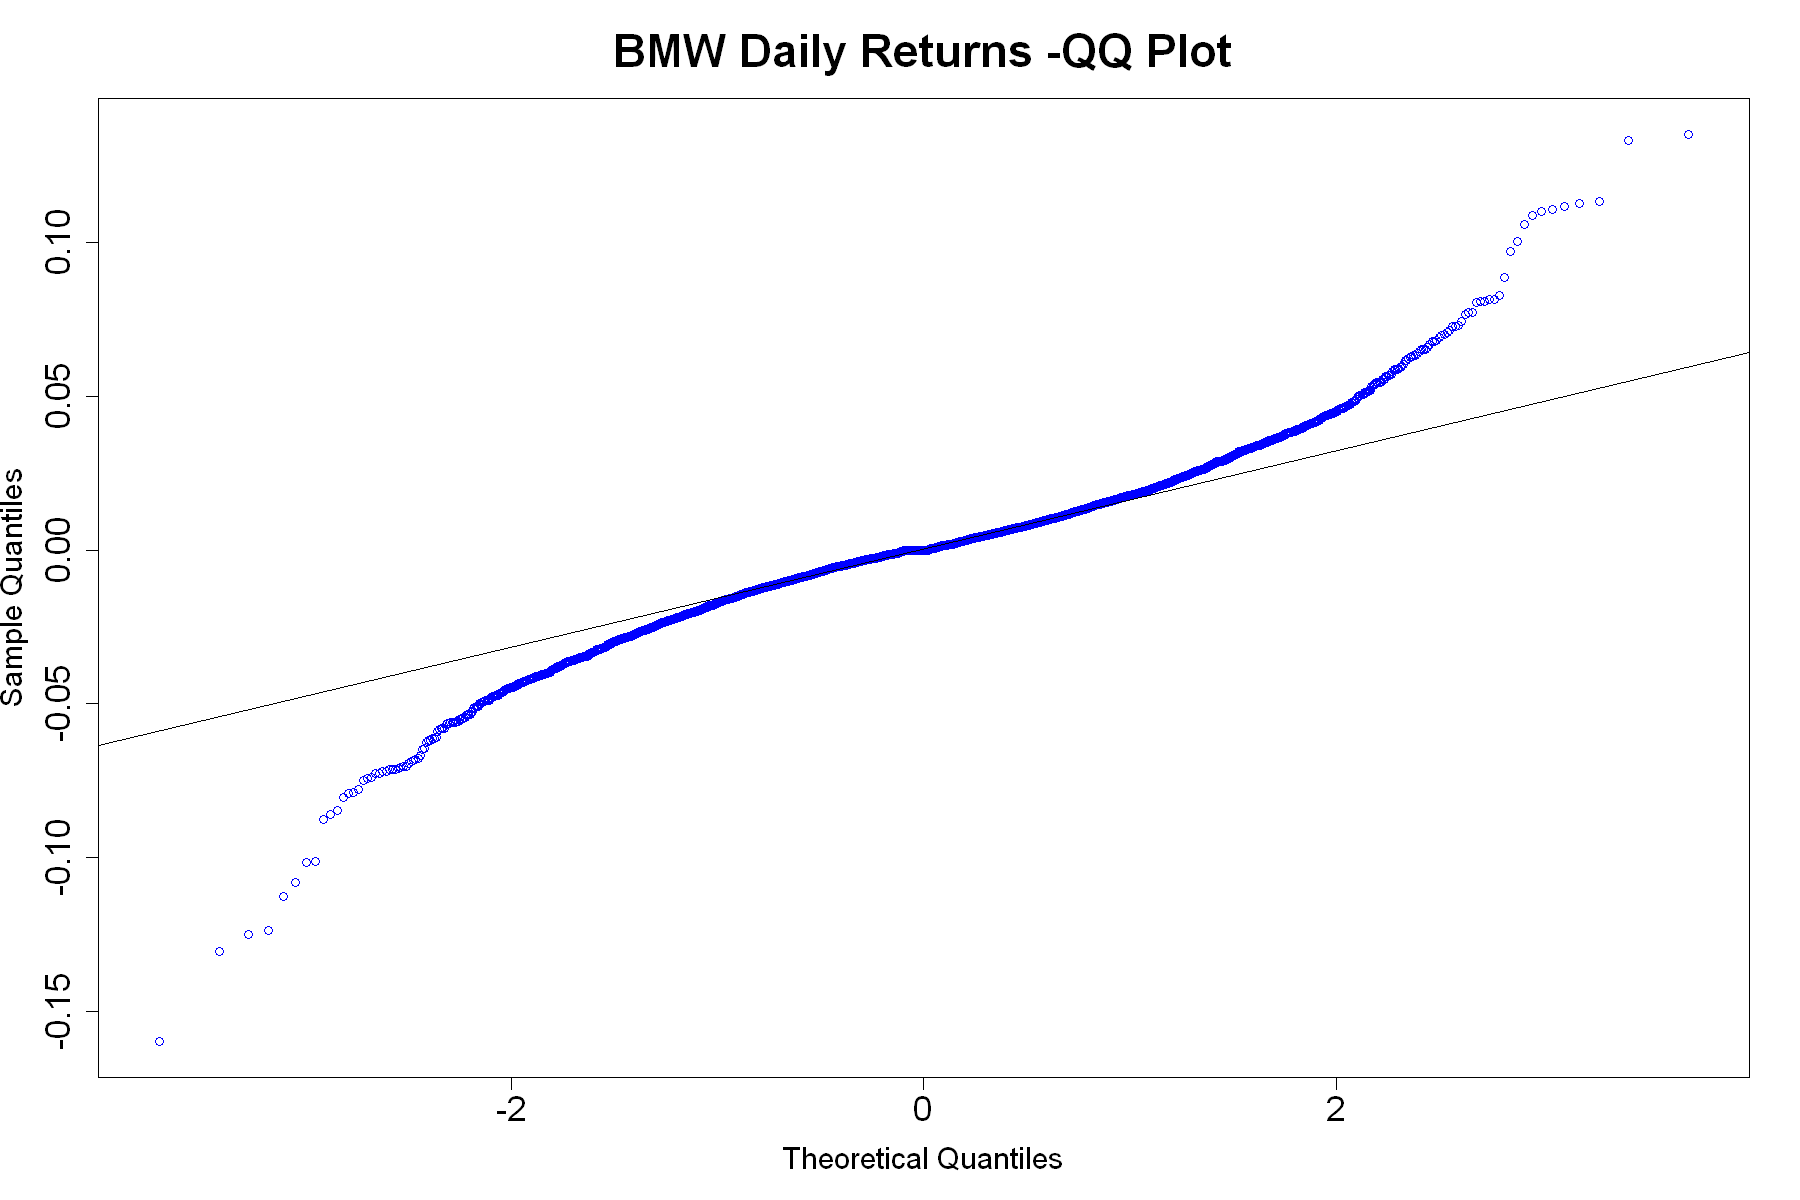

In [33]:
##QQ-plot
options(repr.plot.width=15, repr.plot.height=10)
qqnorm(Return.BMW, main = "BMW Daily Returns -QQ Plot", col = "blue", cex.lab=1.5, cex.axis=1.7,cex.main=2.3)
qqline(Return.BMW)

* cbind(Return.BMW): This function is combining the values of the variable Return.BMW into a column matrix. The cbind function is used for column-wise binding of vectors or columns into a matrix.

* table.Stats(...): This function, returns a basic set of statistics that match the period of the data passed in (e.g., monthly returns will get monthly statistics, daily will be daily stats, and so on)

* t(...): This function transposes the result obtained from table.Stats(cbind(Return.BMW)). The t function flips the rows and columns of a matrix.

In [64]:
table.Stats(cbind(Return.BMW))

Observations,4697.0000
NAs,0.0000
Minimum,-0.1598
Quartile 1,-0.0104
Median,0.0000
Arithmetic Mean,0.0004
Geometric Mean,0.0002
Quartile 3,0.0112
Maximum,0.1352
SE Mean,0.0003
LCL Mean (0.95),-0.0002


In [34]:

t(table.Stats(cbind(Return.BMW)))


,Observations,NAs,Minimum,Quartile 1,Median,Arithmetic Mean,Geometric Mean,Quartile 3,Maximum,SE Mean,LCL Mean (0.95),UCL Mean (0.95),Variance,Stdev,Skewness,Kurtosis
Return.BMW,4697,0,-0.1598,-0.0104,0,4e-04,2e-04,0.0112,0.1352,3e-04,-2e-04,0.001,5e-04,0.0218,-0.011,4.3723


In [35]:
#conduct Jarque-Bera test
jarque.bera.test(Return.BMW)


	Jarque Bera Test

data:  Return.BMW
X-squared = 3741.4, df = 2, p-value < 2.2e-16


This tells us that the test statistic is 3741.4 and the p-value of the test is 0.000. In this case, **we would reject the null hypothesis that the data is not normally distributed**.

# Check for ARCH Effect

The first step consists of Convert to xts for time series features.

In R, xts stands for **eXtensible Time Series**, and it refers to both a package and a class for handling time series data. The xts package provides a set of tools for creating, manipulating, and analyzing time series objects in R. It is particularly useful for financial and econometric applications where time is an essential component of the data.


In [36]:
## Convert to xts for time series features
Return.BMW<-as.xts(Return.BMW)

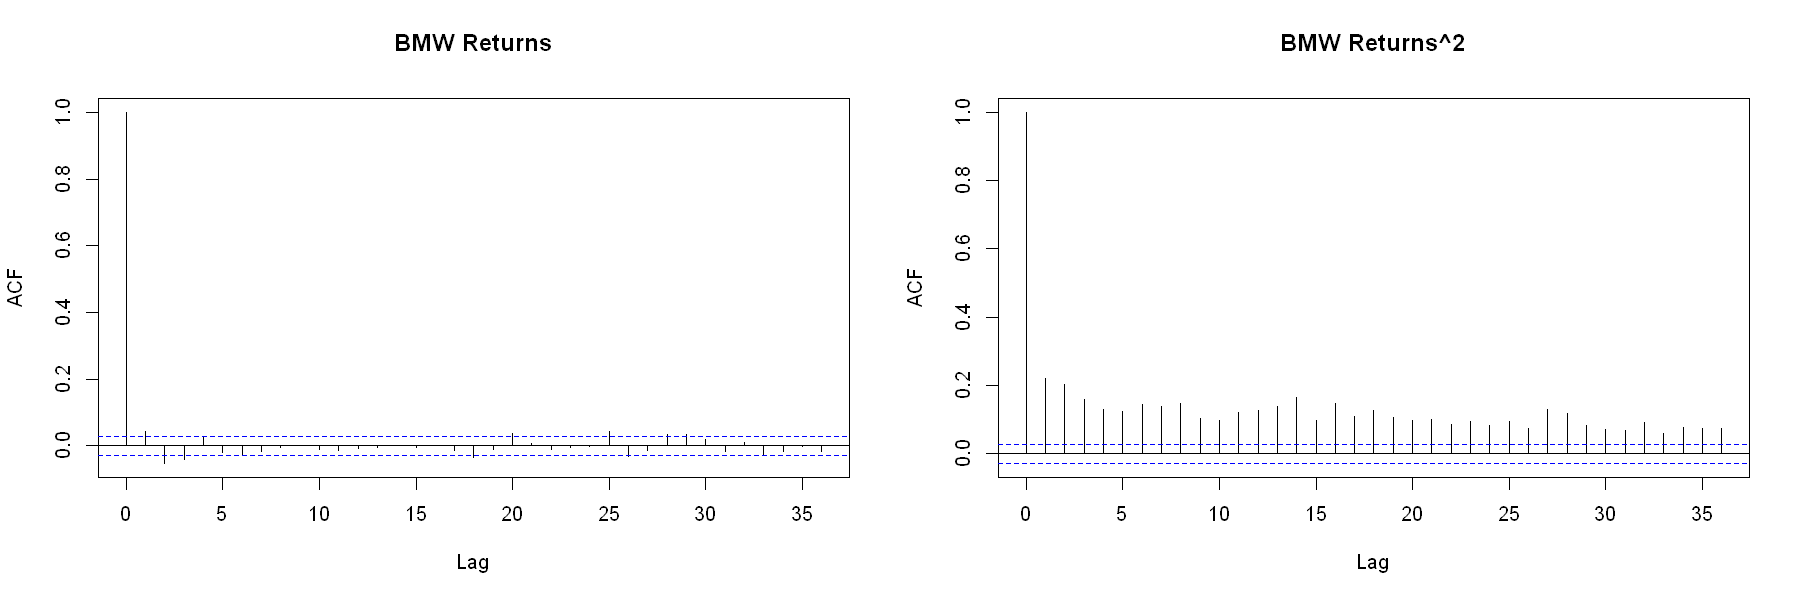

In [65]:
# plot autocorrelations of returns, returns^2 and abs(returns)
options(repr.plot.width=15, repr.plot.height=5)

par(mfrow=c(1,2))

 acf(Return.BMW, main="BMW Returns",cex.main=10)
 acf(Return.BMW^2, main="BMW Returns^2",cex.main=10)
# acf(abs(Return.BMW), main="BMW abs(Returns)",cex.main=10)

par(mfrow=c(1,1)) # Restore the setting

# Ljung-Box Test
$H_0$ is the null hypothesis."No autocorrelation" means that the correlation between the time series and its own past values (up to lag  m) is not significantly different from zero.
The alternative hypothesis ($H_1$) is that there is autocorrelation in the time series at one or more lags.

In [66]:
# use Ljung Box.test from stats package to check auto correlation in square returns
Box.test(coredata(Return.BMW^2), type="Ljung-Box", lag = 12)


	Box-Ljung test

data:  coredata(Return.BMW^2)
X-squared = 1222.9, df = 12, p-value < 2.2e-16


**p<0.05  We reject the null hypothesis** . It mean auto correlation is present, so data is not independent.

# The ARCH effect
The ARCH effect indicates the presence of **changing volatility or variability** in a time series.

In [69]:
ArchTest(Return.BMW)



	ARCH LM-test; Null hypothesis: no ARCH effects

data:  Return.BMW
Chi-squared = 500.01, df = 12, p-value < 2.2e-16


The LM test shows p-value less than 0.05 which indicates that null hypothesis (no arch effect) can be rejected. Therefore, the BMW Returns exhibit ARCH effect.

# Estimation of ARCH Models with rugarch Package
The **rugarch package**, which is commonly used for modeling financial time series data

## (spec) object for a GARCH model
Let's create a create a specification (spec) object for a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model.

This **ugarchspec** statement is configuring the GARCH model to have one autoregressive term (p = 1) and no moving average term (q = 0) in its variance equation.



In [40]:
#Specify the model
spec = ugarchspec(variance.model=list(garchOrder=c(1,0)), mean.model=list(armaOrder=c(0,0)),distribution.model="norm")


#Fit ARCH Model
arch11.fit=ugarchfit(data=Return.BMW,spec=spec, solver='hybrid')


In [73]:
#Conditional Volayility Plot
options(repr.plot.width=10, repr.plot.height=5)


# The sigma R function
sigma(arch11.fit): This extracts the conditional standard deviation (volatility) from the fitted ARCH model object arch11.fit. The sigma function is often used to obtain volatility estimates from GARCH or ARCH models

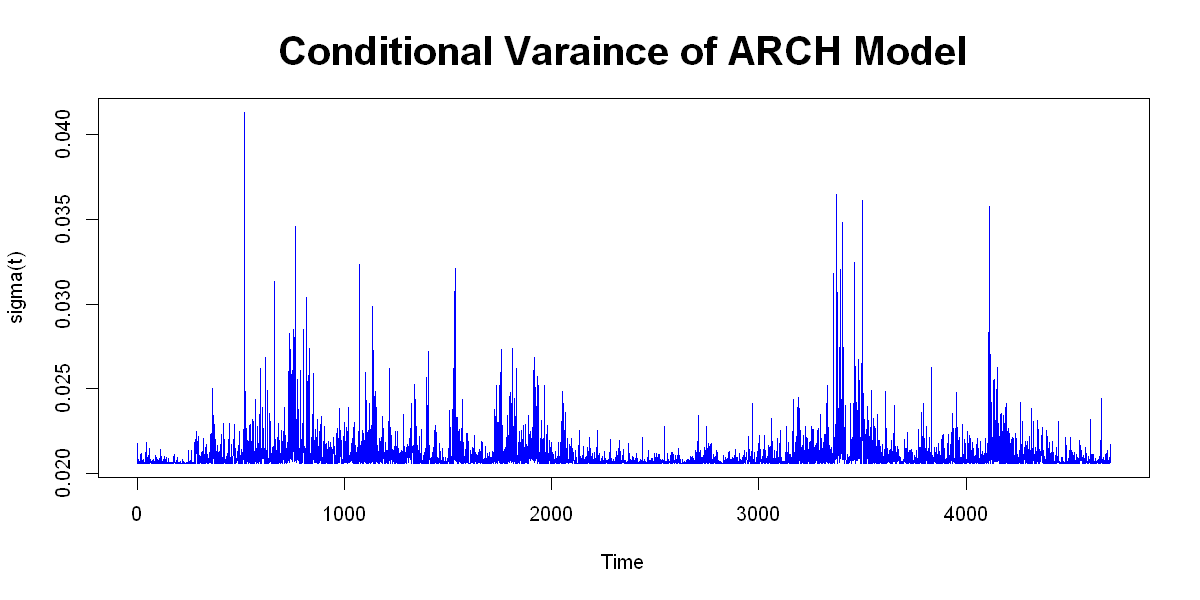

In [74]:

plot.ts(sigma(arch11.fit), ylab="sigma(t)", col="blue", main = "Conditional Varaince of ARCH Model", cex.main=2)


# Estimation of GARCH(1,1) with Normal distribution

In [44]:
#Specify GARCH models:
spec = ugarchspec(variance.model=list(garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model="norm",)

In [45]:
#fit GARCH model
garch.fit=ugarchfit(data=Return.BMW,spec=spec)

In [46]:
##summary of GArch fit
garch.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000779    0.000232   3.3573 0.000787
omega   0.000002    0.000002   1.0626 0.287983
alpha1  0.071581    0.015058   4.7538 0.000002
beta1   0.926547    0.015336  60.4162 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000779    0.000321  2.42733  0.01521
omega   0.000002    0.000016  0.14202  0.88706
alpha1  0.071581    0.106502  0.67211  0.50151
beta1   0.926547    0.110184  8.40911  0.00000

LogLikelihood : 12002.45 

Information Criteria
------------------------------------
                    
Akaike       -5.1090
Bayes        -5.1035
Shibata      -5.1090
Hannan-Quinn -5.1071

Weig

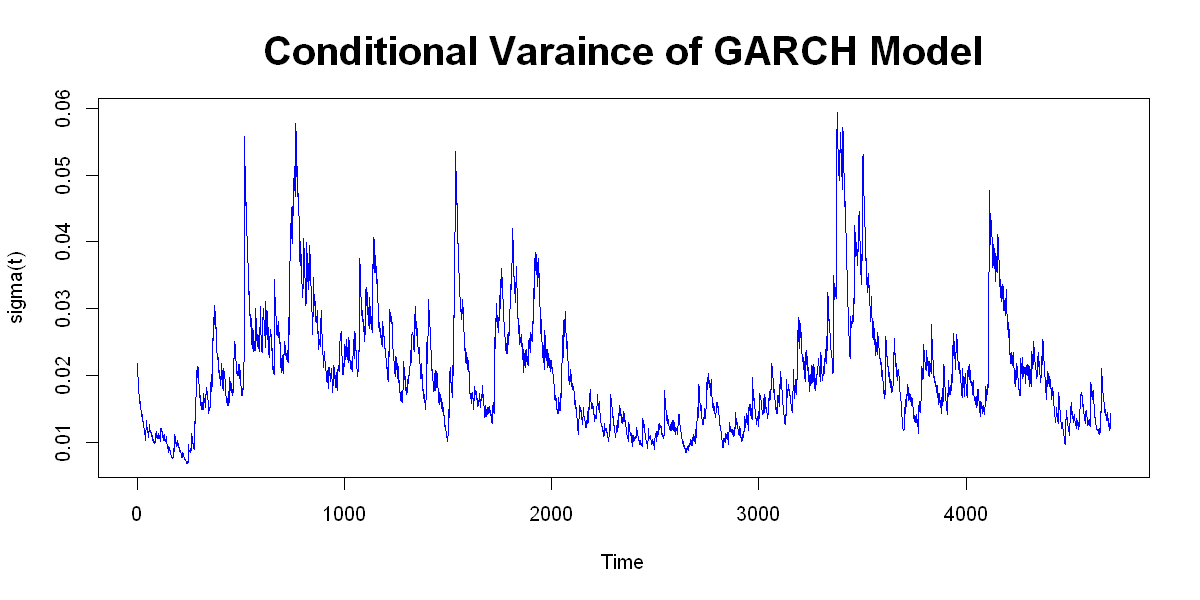

In [47]:
#Conditional Volatility Plot for GARCH Model
options(repr.plot.width=10, repr.plot.height=5)
plot.ts(sigma(garch.fit), ylab="sigma(t)", col="blue", main = "Conditional Variance of GARCH Model", cex.main=2)
